In [2]:
#Définition des librairies
library(jsonlite)
library(Hmisc)
library(FactoMineR)
library(rpart)
library(rpart.plot)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units

Warning message:
“package ‘rpart.plot’ was built under R version 3.4.2”

In [3]:
#Chargement du jeu de données
path="/home/user/Documents/STA211-Datamining/Projet_STA/"
Airbnb<-fromJSON(paste(path,"airbnb_V3.json",sep=""))
sapply(Airbnb,class)
summary(Airbnb)


_id           accommodates              bathrooms 
             "integer"            "character"            "character" 
              bed_type               bedrooms                   beds 
           "character"            "character"            "character" 
         property_type              room_type         arrondissement 
           "character"            "character"              "numeric" 
host_identity_verified      host_is_superhost          host_listings 
           "character"            "character"            "character" 
         host_response             host_since          cancel_policy 
           "character"            "character"            "character" 
      instant_bookable        availability_30       availability_365 
           "character"              "integer"              "integer" 
       availability_60        availability_90           first_review 
             "integer"              "integer"            "character" 
           last_review             nb_reviews    score_communication 
           "character"            "character"              "numeric" 
        score_location            score_other      reviews_per_month 
             "numeric"              "numeric"              "numeric" 
           total_price            price_level 
             "numeric"            "character"

      _id           accommodates        bathrooms           bed_type        
 Min.   :    2525   Length:41094       Length:41094       Length:41094      
 1st Qu.: 3688220   Class :character   Class :character   Class :character  
 Median : 7887020   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8425822                                                           
 3rd Qu.:13304907                                                           
 Max.   :17968815                                                           
   bedrooms             beds           property_type       room_type        
 Length:41094       Length:41094       Length:41094       Length:41094      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

In [4]:
character_vars <- lapply(Airbnb, class) == "character"
Airbnb[, character_vars] <- lapply(Airbnb[, character_vars], as.factor)
#définition de la variable arrondissement comme qualitative
Airbnb$arrondissement <- as.factor(Airbnb$arrondissement ) 
sapply(Airbnb,class)

_id           accommodates              bathrooms 
             "integer"               "factor"               "factor" 
              bed_type               bedrooms                   beds 
              "factor"               "factor"               "factor" 
         property_type              room_type         arrondissement 
              "factor"               "factor"               "factor" 
host_identity_verified      host_is_superhost          host_listings 
              "factor"               "factor"               "factor" 
         host_response             host_since          cancel_policy 
              "factor"               "factor"               "factor" 
      instant_bookable        availability_30       availability_365 
              "factor"              "integer"              "integer" 
       availability_60        availability_90           first_review 
             "integer"              "integer"               "factor" 
           last_review             nb_reviews    score_communication 
              "factor"               "factor"              "numeric" 
        score_location            score_other      reviews_per_month 
             "numeric"              "numeric"              "numeric" 
           total_price            price_level 
             "numeric"               "factor"

In [5]:
#suppression de la variable Prix total
Airbnb <- subset(Airbnb, select = -c(total_price) )

In [6]:
# Arbre sur la variable price_level
AirbnbTree <- rpart(price_level~.,data=Airbnb,control=rpart.control(minsplit=50,cp = 0.005, xval=20))
#AirbnbTree <- rpart(price_level~.,data=Airbnb,control=rpart.control(minsplit=500,cp = 0.01, xval=20))
printcp(AirbnbTree)


Classification tree:
rpart(formula = price_level ~ ., data = Airbnb, control = rpart.control(minsplit = 50, 
    cp = 0.005, xval = 20))

Variables actually used in tree construction:
[1] accommodates     arrondissement   availability_365 bedrooms        
[5] host_listings    room_type       

Root node error: 30197/41084 = 0.73501

n=41084 (10 observations deleted due to missingness)

         CP nsplit rel error  xerror      xstd
1 0.1735603      0   1.00000 1.00000 0.0029623
2 0.0707024      1   0.82644 0.82992 0.0032739
3 0.0200351      2   0.75574 0.75574 0.0033354
4 0.0168560      3   0.73570 0.73570 0.0033450
5 0.0150015      4   0.71885 0.72130 0.0033500
6 0.0060602      6   0.68884 0.68941 0.0033559
7 0.0059609      7   0.68278 0.68457 0.0033561
8 0.0050000      9   0.67086 0.67252 0.0033559


In [7]:

bestcp <- AirbnbTree$cptable[which.min(AirbnbTree$cptable[,"xerror"]),"CP"]

# Step3: Prune the tree using the best cp.
Airbnb_pruned <- prune(AirbnbTree, cp = bestcp)
printcp(Airbnb_pruned)


Classification tree:
rpart(formula = price_level ~ ., data = Airbnb, control = rpart.control(minsplit = 50, 
    cp = 0.005, xval = 20))

Variables actually used in tree construction:
[1] accommodates     arrondissement   availability_365 bedrooms        
[5] host_listings    room_type       

Root node error: 30197/41084 = 0.73501

n=41084 (10 observations deleted due to missingness)

         CP nsplit rel error  xerror      xstd
1 0.1735603      0   1.00000 1.00000 0.0029623
2 0.0707024      1   0.82644 0.82992 0.0032739
3 0.0200351      2   0.75574 0.75574 0.0033354
4 0.0168560      3   0.73570 0.73570 0.0033450
5 0.0150015      4   0.71885 0.72130 0.0033500
6 0.0060602      6   0.68884 0.68941 0.0033559
7 0.0059609      7   0.68278 0.68457 0.0033561
8 0.0050000      9   0.67086 0.67252 0.0033559


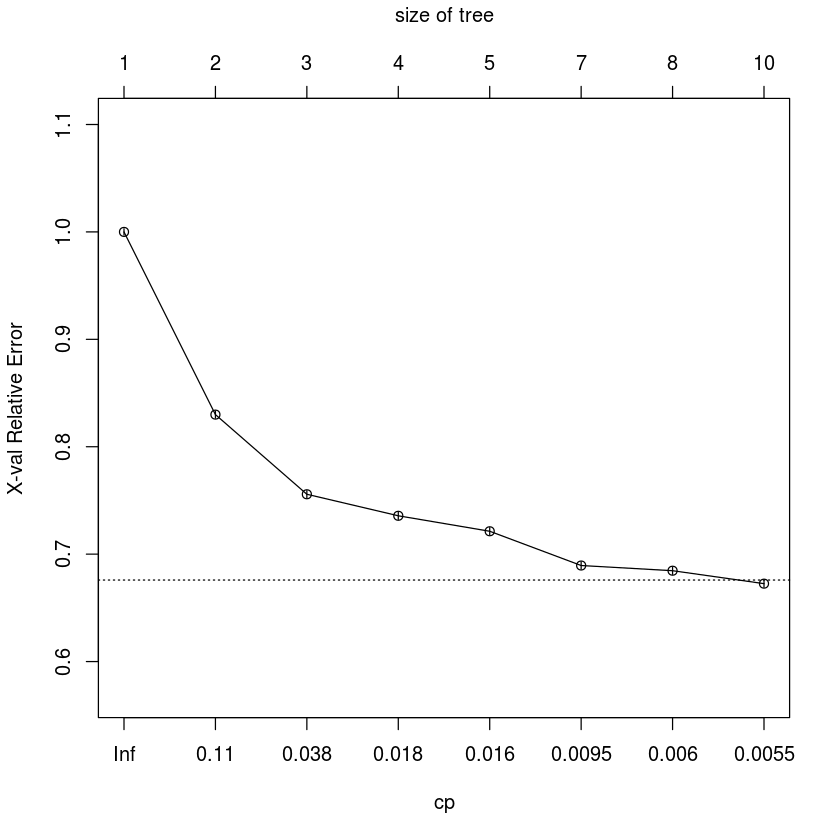

In [8]:
plotcp(AirbnbTree)

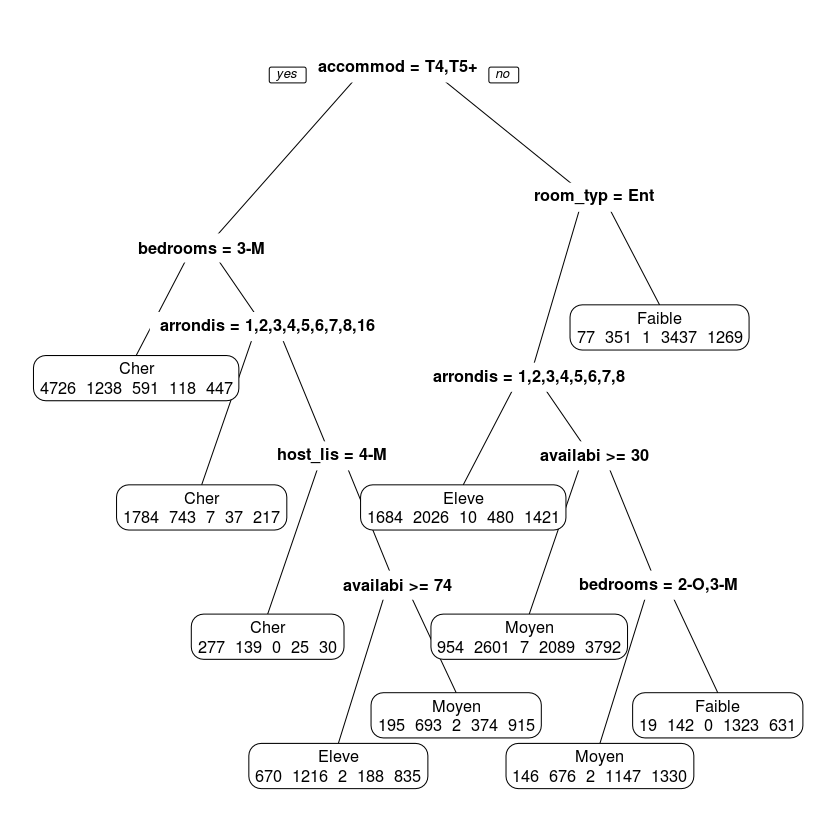

In [9]:
prp(Airbnb_pruned,extra=1)

cex 0.675   xlim c(0, 1)   ylim c(0, 1)


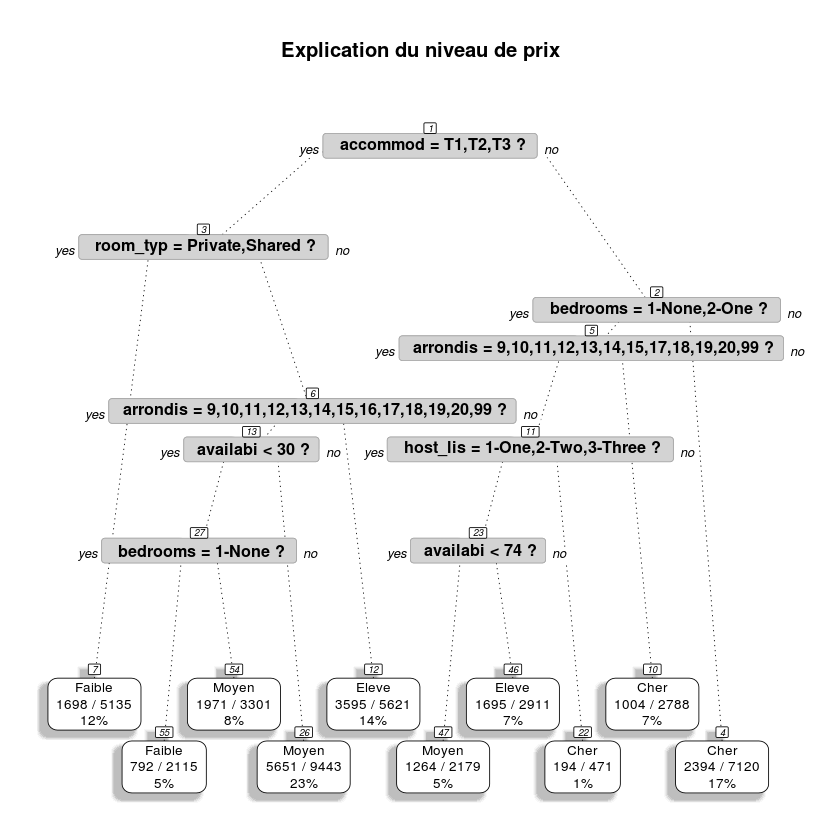

In [10]:
prp(AirbnbTree, main="Explication du niveau de prix",
    extra=103,           # display prob of survival and percent of obs
    nn=TRUE,             # display the node numbers
    fallen.leaves=TRUE,  # put the leaves on the bottom of the page
    shadow.col="gray",   # shadows under the leaves
    branch.lty=3,        # draw branches using dotted lines
    branch=.5,           # change angle of branch lines
    yesno=2,
    xflip=TRUE,
    faclen=0,            # faclen=0 to print full factor names
    trace=1,             # print the automatically calculated cex
    split.cex=1.2,       # make the split text larger than the node text
#    split.prefix="is ",  # put "is " before split text
    split.suffix=" ?",    # put "?" after split text
#    col=cols, border.col=cols,   # green if survived
    split.box.col="lightgray",   # lightgray split boxes (default is white)
    split.border.col="darkgray", # darkgray border on split boxes
    split.round=.5)              # round the split box corners a tad

In [11]:
library(RColorBrewer)
library(rattle)
jpeg("/home/user/Documents/STA211-Datamining/Projet_STA/Tree2_level_2.jpg", width=700, height=1000,quality=100)
plot.new()
fancyRpartPlot(AirbnbTree, sub = '')
title(main="Arbre de décision sur Price_level", cex.main=3, line=1)

dev.off()

Rattle: A free graphical interface for data science with R.
Version 5.1.0 Copyright (c) 2006-2017 Togaware Pty Ltd.
Entrez 'rattle()' pour secouer, faire vibrer, et faire défiler vos données.


png 
  2

In [12]:
library(htmlTable)
suppressPackageStartupMessages(library(IRdisplay))
library(repr)
pred=predict(object = AirbnbTree,newdata = Airbnb,type="class")
mc<-table(Airbnb$price_level,pred)
mytableout = htmlTable (mc)
display_html(mytableout)


pred 
 
 
 
 Cher 
 Eleve 
 Exorbitant 
 Faible 
 Moyen 
 
 
 
 
 Cher 
 6787 
 2354 
 0 
 96 
 1295 
 
 
 Eleve 
 2120 
 3242 
 0 
 493 
 3970 
 
 
 Exorbitant 
 598 
 12 
 0 
 1 
 11 
 
 
 Faible 
 180 
 668 
 0 
 4760 
 3610 
 
 
 Moyen 
 694 
 2256 
 0 
 1900 
 6037